## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
#Merge on mouse ID

renamed_study = study_results.rename(columns={"Tumor Volume (mm3)":"Tumor_Volume"})
renamed_study.head()

merged_data = pd.merge(mouse_metadata, renamed_study, on="Mouse ID", how="outer")
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
#and SEM of the tumor volume for each regimen



In [2]:
format_table = merged_data.groupby('Drug Regimen').Tumor_Volume.agg(['mean', 'median', 'var', 'std', 'sem'])
format_table.round(2)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

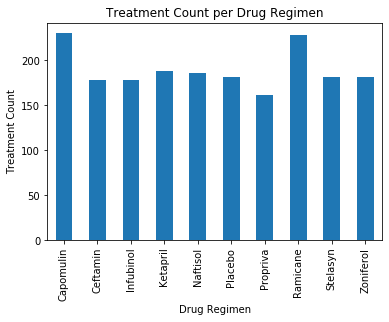

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

merged_data.groupby('Drug Regimen')['Mouse ID'].count().plot(kind='bar')

plt.title("Treatment Count per Drug Regimen")
plt.ylabel("Treatment Count")
plt.show()


In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
simple_merge = merged_data[["Mouse ID","Drug Regimen"]]
simple_merge

,Mouse ID,Drug Regimen
0,k403,Ramicane
1,k403,Ramicane
2,k403,Ramicane
3,k403,Ramicane
4,k403,Ramicane
...,...,...
1888,z969,Naftisol
1889,z969,Naftisol
1890,z969,Naftisol
1891,z969,Naftisol


In [5]:
simple_merge['Drug Regimen'].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Treatment Count')

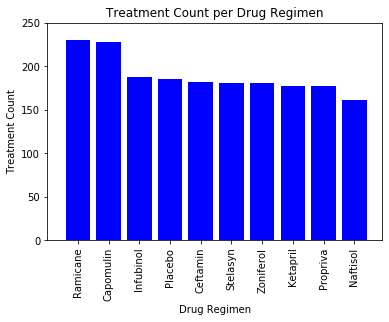

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot


regimen = simple_merge['Drug Regimen'].unique()
treatment_count = simple_merge['Drug Regimen'].value_counts()
x_axis = np.arange(len(treatment_count))

plt.bar(x_axis, treatment_count, color="b", align="center")

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, regimen, rotation=90)

plt.xlim(-1, len(x_axis)-.1)
plt.ylim(0, max(treatment_count)+20)

plt.title("Treatment Count per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Treatment Count")


## Pie plots

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_count = pd.DataFrame(merged_data["Sex"].value_counts())
gender_count



,Sex
Male,958
Female,935


Text(0.5, 1.0, 'Gender Distribution of Mice')

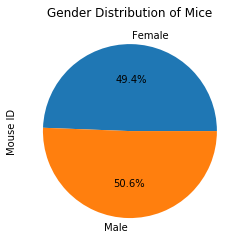

In [8]:
merged_data.groupby('Sex')['Mouse ID'].count().plot(kind='pie', autopct="%1.1f%%")
plt.title("Gender Distribution of Mice")


/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


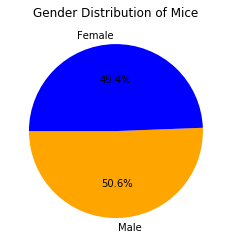

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_type = merged_data['Sex'].unique()
colors = ["orange","blue"]
explode = (0,0)

plt.pie(gender_count, explode=explode, labels=gender_type, colors=colors,
        autopct="%1.1f%%", startangle=180)

plt.title("Gender Distribution of Mice")

plt.show()


## Quartiles, outliers and boxplots

In [66]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Capomulin, Ramicane, Infubinol, and Ceftamin


time_max = merged_data[["Drug Regimen", "Mouse ID","Timepoint","Tumor_Volume"]]
renamed_time = time_max.rename(columns={"Drug Regimen":"Drug_Regimen"})
renamed_time

# If Column Drug Regimen is one of (Capomulin, Ramicane, Infubinol, and Ceftamin) and Timepoint = 45, then Tumor Volume

top_regimens = ['Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Stelasyn', 'Zoniferol']
updated_time = renamed_time[~renamed_time.Drug_Regimen.str.contains('|'.join(top_regimens))]
    
final = updated_time.loc[updated_time['Timepoint'] == 45]
final.head()


,Drug_Regimen,Mouse ID,Timepoint,Tumor_Volume
9,Ramicane,k403,45,22.050126
19,Capomulin,s185,45,23.343598
29,Capomulin,x401,45,28.484033
39,Capomulin,m601,45,28.430964
49,Ramicane,g791,45,29.128472


In [63]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest



,Drug_Regimen,Mouse ID,Timepoint,Tumor_Volume
9,Ramicane,k403,45,22.050126
19,Capomulin,s185,45,23.343598
29,Capomulin,x401,45,28.484033
39,Capomulin,m601,45,28.430964
49,Ramicane,g791,45,29.128472
...,...,...,...,...
1797,Ceftamin,x822,45,61.386660
1813,Infubinol,y163,45,67.685569
1845,Ceftamin,y769,45,68.594745
1855,Ceftamin,y865,45,64.729837


## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume 
# for the Capomulin regimen